In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import NullFormatter

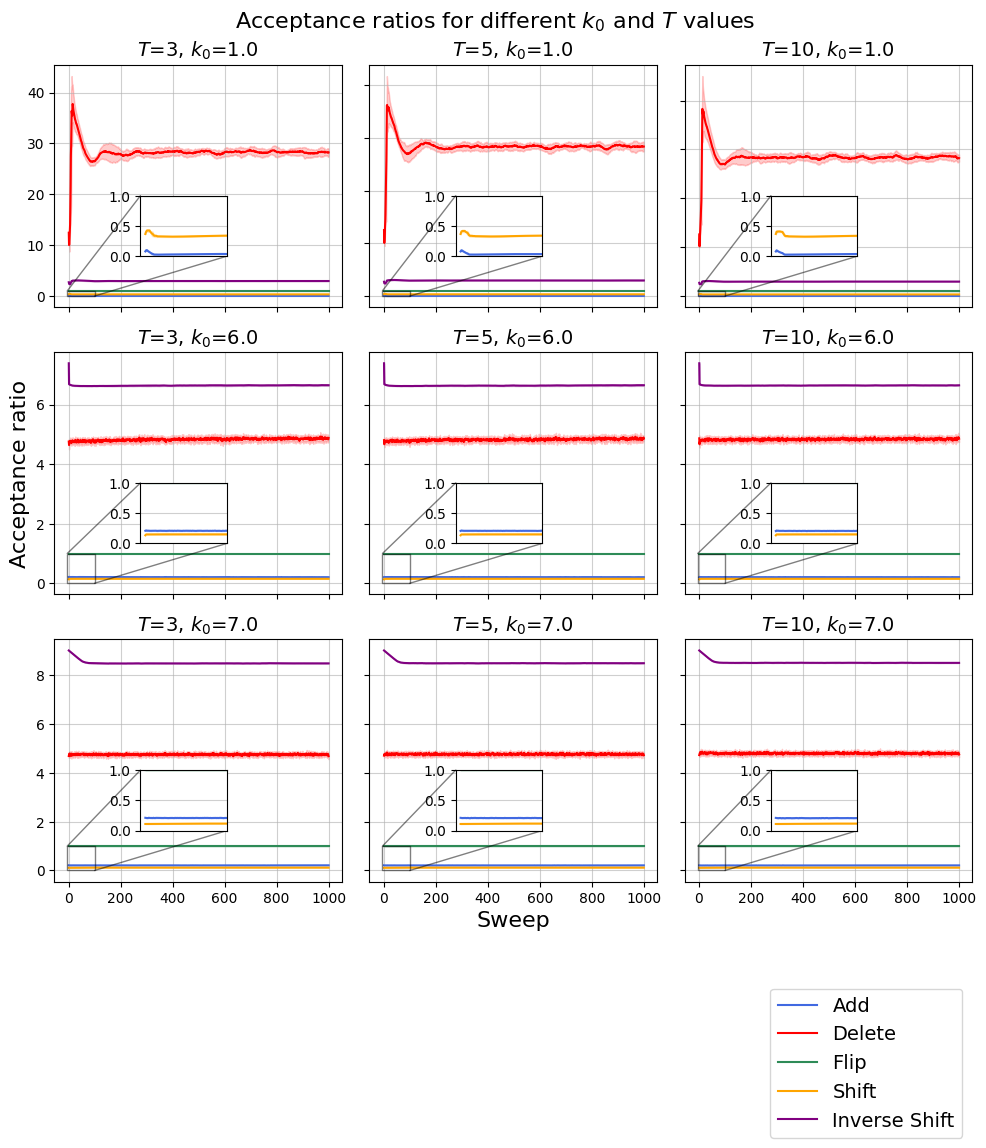

In [43]:
k0_values = [1.0, 6.0, 7.0]
T_values = [3, 5, 10]
target_volume = 3000
ksteps = target_volume * 100

fig, axes = plt.subplots(len(k0_values), len(T_values), figsize=(10, 12))

for i, k0 in enumerate(k0_values):
    for j, T in enumerate(T_values):
        path = f'measurements_thermal/k0={k0}'
        filepaths_ar = glob.glob(f'{path}/T{T}*tswps=1000_*kstps={ksteps}*acceptance_ratios.npy')
        ar_add = []
        ar_delete = []
        ar_flip = []
        ar_shift = []
        ar_ishift = []

        for filepath in filepaths_ar:
            ar = np.load(filepath)
            ar_add.append(ar[:, 0])
            ar_delete.append(ar[:, 1])
            ar_flip.append(ar[:, 2])
            ar_shift.append(ar[:, 3])
            ar_ishift.append(ar[:, 4])

        df_ar_add = pd.DataFrame(ar_add)
        df_ar_delete = pd.DataFrame(ar_delete)
        df_ar_flip = pd.DataFrame(ar_flip)
        df_ar_shift = pd.DataFrame(ar_shift)
        df_ar_ishift = pd.DataFrame(ar_ishift)

        df_ar_add = df_ar_add.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
        df_ar_delete = df_ar_delete.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
        df_ar_flip = df_ar_flip.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
        df_ar_shift = df_ar_shift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
        df_ar_ishift = df_ar_ishift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()

        df_ar_add['sweep'] += 1
        df_ar_delete['sweep'] += 1
        df_ar_flip['sweep'] += 1
        df_ar_shift['sweep'] += 1
        df_ar_ishift['sweep'] += 1

        ax = axes[i, j]
        sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue', ax=ax)
        sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='red', ax=ax)
        sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen', ax=ax)
        sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='orange', ax=ax)
        sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple', ax=ax)
        ax.set_title(f'$T$={T}, $k_0$={k0}', fontsize=14)
        ax.grid(True, which="both", ls="-", alpha=0.6)

        # Add zoom-in box with y [0, 1] place in the center of the plot
        axins = ax.inset_axes([0.3, 0.21, 0.3, 0.25])
        sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', color='royalblue', ax=axins)
        sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd',color='red', ax=axins)
        sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', color='seagreen', ax=axins)
        sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', color='orange', ax=axins)
        sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd',color='purple', ax=axins)
        axins.set_xlim(-5, 100)
        axins.set_ylim(0, 1)
        axins.set_xticks([])
        axins.set_yticks([0, 0.5, 1])
        axins.set_xlabel('')
        axins.set_ylabel('')
        axins.grid(True, which="both", ls="-", alpha=0.6)
        ax.indicate_inset_zoom(axins, edgecolor='black')

        # Remove x and y labels
        ax.set_xlabel('')
        ax.set_ylabel('')

        # Only keep axis ticks on the left and bottom
        if i != len(k0_values) - 1:
            ax.xaxis.set_major_formatter(NullFormatter())
            axins.xaxis.set_major_formatter(NullFormatter())
        if j != 0:
            ax.yaxis.set_major_formatter(NullFormatter())

        ax.get_legend().remove()

        if i == 1 and j == 0:
            ax.set_ylabel('Acceptance ratio', fontsize=16)
        
        # If last row and middle column, add x label
        if i == 2 and j == 1:
            ax.set_xlabel('Sweep', fontsize=16)

# Add general labels to the figure
fig.suptitle('Acceptance ratios for different $k_0$ and $T$ values', fontsize=16)

# Remove rendundant legend labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right', bbox_to_anchor=(1, -1.1), fontsize=14)

# Put the legend out of the figure
plt.subplots_adjust(right=0.85)
plt.tight_layout()
plt.savefig('plots/acceptance_ratios/acceptance_probabilities_T.png', dpi=400, bbox_inches='tight')

<>:49: SyntaxWarning: invalid escape sequence '\w'
<>:89: SyntaxWarning: invalid escape sequence '\w'
<>:49: SyntaxWarning: invalid escape sequence '\w'
<>:89: SyntaxWarning: invalid escape sequence '\w'
C:\Users\sedad\AppData\Local\Temp\ipykernel_16036\58970114.py:49: SyntaxWarning: invalid escape sequence '\w'
  ax.set_title(f'$\widetilde{{N}}_{{31}}$={N}, $k_0$={k0}', fontsize=14)
C:\Users\sedad\AppData\Local\Temp\ipykernel_16036\58970114.py:89: SyntaxWarning: invalid escape sequence '\w'
  fig.suptitle('Acceptance ratios for different $k_0$ and $\widetilde{N}_{31}$ values', fontsize=16)


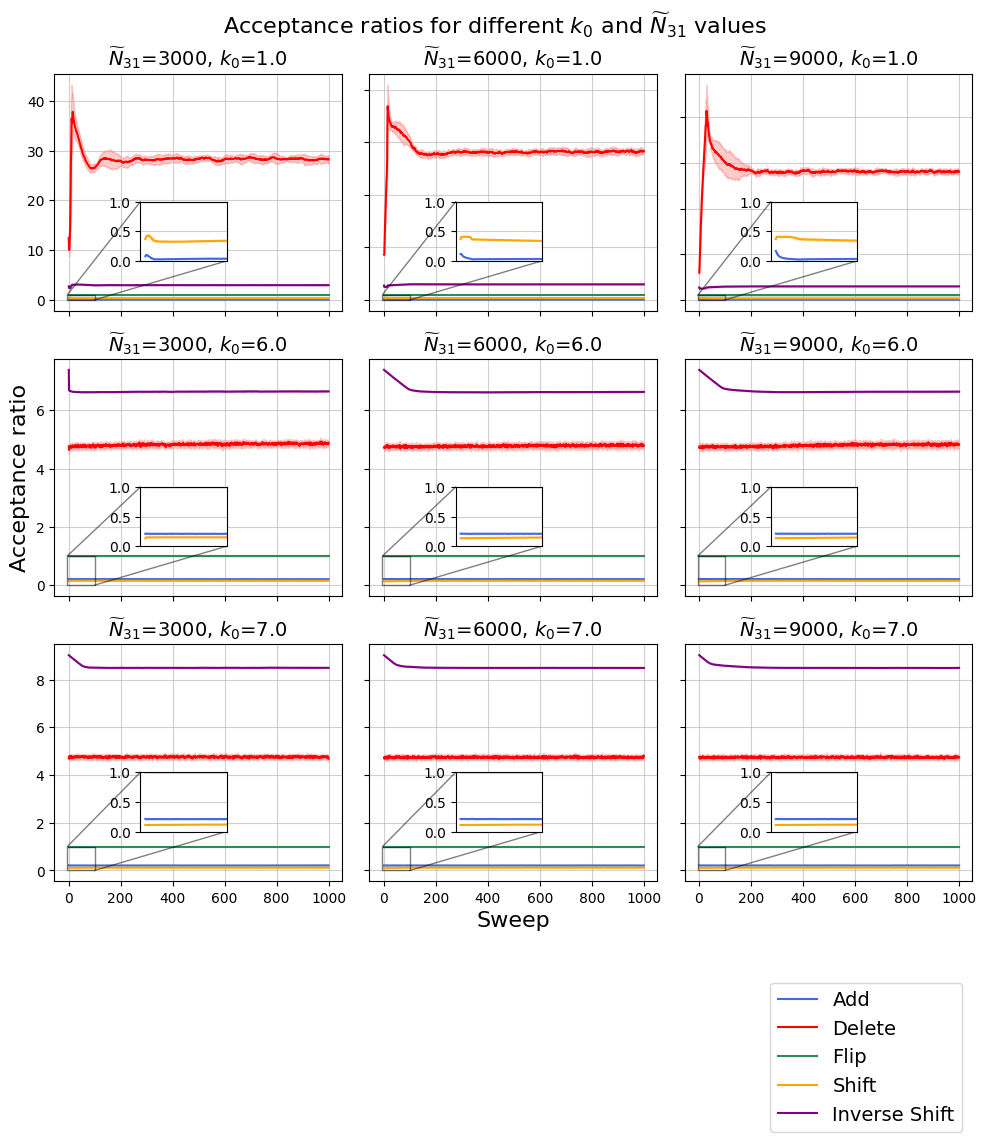

In [44]:
k0_values = [1.0, 6.0, 7.0]
N_values = [3000, 6000, 9000]
T = 3

fig, axes = plt.subplots(len(k0_values), len(N_values), figsize=(10, 12))

for i, k0 in enumerate(k0_values):
    for j, N in enumerate(N_values):
        path = f'measurements_thermal/k0={k0}'
        filepaths_ar = glob.glob(f'{path}/T{T}*tswps=1000_*kstps={N * 100}*acceptance_ratios.npy')
        ar_add = []
        ar_delete = []
        ar_flip = []
        ar_shift = []
        ar_ishift = []

        for filepath in filepaths_ar:
            ar = np.load(filepath)
            ar_add.append(ar[:, 0])
            ar_delete.append(ar[:, 1])
            ar_flip.append(ar[:, 2])
            ar_shift.append(ar[:, 3])
            ar_ishift.append(ar[:, 4])

        df_ar_add = pd.DataFrame(ar_add)
        df_ar_delete = pd.DataFrame(ar_delete)
        df_ar_flip = pd.DataFrame(ar_flip)
        df_ar_shift = pd.DataFrame(ar_shift)
        df_ar_ishift = pd.DataFrame(ar_ishift)

        df_ar_add = df_ar_add.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
        df_ar_delete = df_ar_delete.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
        df_ar_flip = df_ar_flip.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
        df_ar_shift = df_ar_shift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
        df_ar_ishift = df_ar_ishift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()

        df_ar_add['sweep'] += 1
        df_ar_delete['sweep'] += 1
        df_ar_flip['sweep'] += 1
        df_ar_shift['sweep'] += 1
        df_ar_ishift['sweep'] += 1

        ax = axes[i, j]
        sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue', ax=ax)
        sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='red', ax=ax)
        sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen', ax=ax)
        sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='orange', ax=ax)
        sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple', ax=ax)
        ax.set_title(f'$\widetilde{{N}}_{{31}}$={N}, $k_0$={k0}', fontsize=14)
        ax.grid(True, which="both", ls="-", alpha=0.6)

        # Add zoom-in box with y [0, 1] place in the center of the plot
        axins = ax.inset_axes([0.3, 0.21, 0.3, 0.25])
        sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', color='royalblue', ax=axins)
        sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd',color='red', ax=axins)
        sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', color='seagreen', ax=axins)
        sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', color='orange', ax=axins)
        sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd',color='purple', ax=axins)
        axins.set_xlim(-5, 100)
        axins.set_ylim(0, 1)
        axins.set_xticks([])
        axins.set_yticks([0, 0.5, 1])
        axins.set_xlabel('')
        axins.set_ylabel('')
        axins.grid(True, which="both", ls="-", alpha=0.6)
        ax.indicate_inset_zoom(axins, edgecolor='black')

        # Remove x and y labels
        ax.set_xlabel('')
        ax.set_ylabel('')

        # Only keep axis ticks on the left and bottom
        if i != len(k0_values) - 1:
            ax.xaxis.set_major_formatter(NullFormatter())
            axins.xaxis.set_major_formatter(NullFormatter())
        if j != 0:
            ax.yaxis.set_major_formatter(NullFormatter())

        ax.get_legend().remove()

        if i == 1 and j == 0:
            ax.set_ylabel('Acceptance ratio', fontsize=16)
        
        # If last row and middle column, add x label
        if i == 2 and j == 1:
            ax.set_xlabel('Sweep', fontsize=16)

# Add general labels to the figure
fig.suptitle('Acceptance ratios for different $k_0$ and $\widetilde{N}_{31}$ values', fontsize=16)

# Remove rendundant legend labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right', bbox_to_anchor=(1, -1.1), fontsize=14)

# Put the legend out of the figure
plt.subplots_adjust(right=0.85)
plt.tight_layout()
plt.savefig('plots/acceptance_ratios/acceptance_probabilities_N.png', dpi=400, bbox_inches='tight')


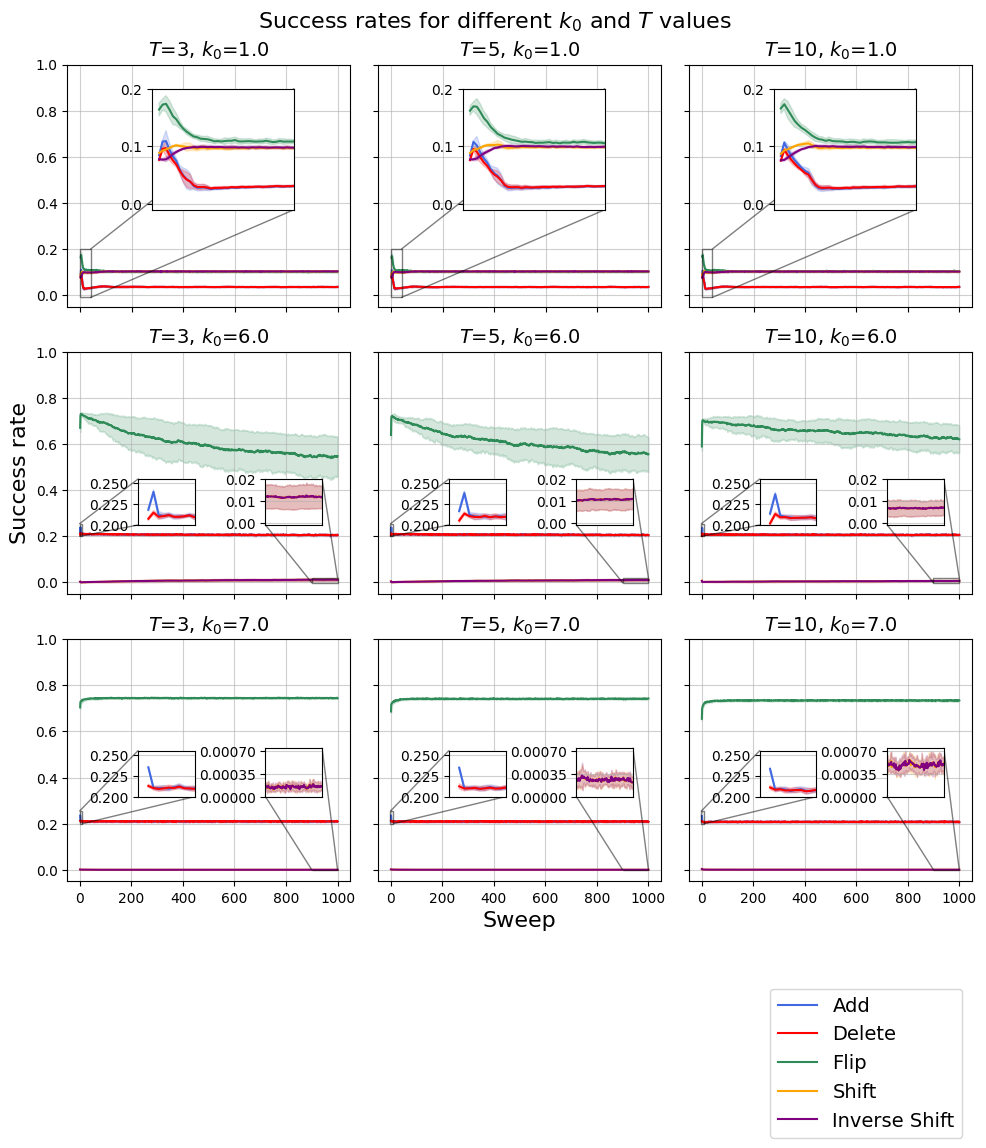

In [15]:
k0_values = [1.0, 6.0, 7.0]
T_values = [3, 5, 10]
target_volume = 3000
ksteps = target_volume * 100

fig, axes = plt.subplots(len(k0_values), len(T_values), figsize=(10, 12))

for i, k0 in enumerate(k0_values):
    for j, T in enumerate(T_values):
        path = f'measurements_thermal/k0={k0}'
        filepaths_successes = glob.glob(f'{path}/T{T}*tswps=1000_*kstps={ksteps}*successes.npy')
        filepaths_fails = glob.glob(f'{path}/T{T}*tswps=1000_*kstps={ksteps}*fails.npy')
        sr_add = []
        sr_delete = []
        sr_flip = []
        sr_shift = []
        sr_ishift = []

        for k in range(len(filepaths_successes)):
            successes = np.load(filepaths_successes[k])
            fails = np.load(filepaths_fails[k])
            sr_add.append(successes[:, 0] / (successes[:, 0] + fails[:, 0]))
            sr_delete.append(successes[:, 1] / (successes[:, 1] + fails[:, 1]))
            sr_flip.append(successes[:, 2] / (successes[:, 2] + fails[:, 2]))
            sr_shift.append(successes[:, 3] / (successes[:, 3] + fails[:, 3]))
            sr_ishift.append(successes[:, 4] / (successes[:, 4] + fails[:, 4]))

        # Make it a df to plot easily the mean and std
        df_sr_add = pd.DataFrame(sr_add)
        df_sr_delete = pd.DataFrame(sr_delete)
        df_sr_flip = pd.DataFrame(sr_flip)
        df_sr_shift = pd.DataFrame(sr_shift)
        df_sr_ishift = pd.DataFrame(sr_ishift)

        # Make a column for chain, sweep and the values sr
        df_sr_add = df_sr_add.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
        df_sr_delete = df_sr_delete.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
        df_sr_flip = df_sr_flip.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
        df_sr_shift = df_sr_shift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
        df_sr_ishift = df_sr_ishift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()

        # Increase sweep number by 1
        df_sr_add['sweep'] += 1
        df_sr_delete['sweep'] += 1
        df_sr_flip['sweep'] += 1
        df_sr_shift['sweep'] += 1
        df_sr_ishift['sweep'] += 1

        ax = axes[i, j]
        sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue', ax=ax)
        sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='red', ax=ax)
        sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', label='Flip', color='seagreen', ax=ax)
        sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='orange', ax=ax)
        sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple', ax=ax)
        ax.set_title(f'$T$={T}, $k_0$={k0}', fontsize=14)
        ax.grid(True, which="both", ls="-", alpha=0.6)

        # Add zoom-in box with y [0, 1] place in the center of the plot
        if i == 0:
            axins = ax.inset_axes([0.3, 0.4, 0.5, 0.5])
            axins.set_xlim(-1, 40)
            axins.set_ylim(-0.01, 0.2)
            axins.set_xticks([])
            axins.set_yticks([0, 0.1, 0.2])
        else:
            if i == 1:
                axins = ax.inset_axes([0.25, 0.285, 0.2, 0.19])
                axins.set_xlim(-1, 10)
                axins.set_ylim(0.2, 0.255)
                axins.set_xticks([])
                axins.set_yticks([0.2, 0.225, 0.25])

                # Add a second zoom-in box for the last row
                axins2 = ax.inset_axes([0.7, 0.285, 0.2, 0.19])
                axins2.set_xlim(900, 1000)
                axins2.set_ylim(-0.001, 0.02)
                axins2.set_xticks([])
                axins2.set_yticks([0, 0.01, 0.02])
            elif i == 2:
                axins = ax.inset_axes([0.25, 0.35, 0.2, 0.19])
                axins.set_xlim(-1, 10)
                axins.set_ylim(0.2, 0.255)
                axins.set_xticks([])
                axins.set_yticks([0.2, 0.225, 0.25])

                # Add a second zoom-in box for the last row
                axins2 = ax.inset_axes([0.7, 0.35, 0.2, 0.2])
                axins2.set_xlim(900, 1000)
                axins2.set_ylim(0, 0.00075)
                axins2.set_xticks([])
                axins2.set_yticks([0, 0.00035, 0.0007])
            
            sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', color='royalblue', ax=axins2)
            sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd',color='red', ax=axins2)
            sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', color='seagreen', ax=axins2)
            sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', color='orange', ax=axins2)
            sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd',color='purple', ax=axins2)
            axins2.set_xlabel('')
            axins2.set_ylabel('')
            axins2.grid(True, which="both", ls="-", alpha=0.6)
            ax.indicate_inset_zoom(axins2, edgecolor='black')

        sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', color='royalblue', ax=axins)
        sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd',color='red', ax=axins)
        sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', color='seagreen', ax=axins)
        sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', color='orange', ax=axins)
        sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd',color='purple', ax=axins)
        axins.set_xlabel('')
        axins.set_ylabel('')
        axins.grid(True, which="both", ls="-", alpha=0.6)
        ax.indicate_inset_zoom(axins, edgecolor='black')

        # Remove x and y labels
        ax.set_xlabel('')
        ax.set_ylabel('')

        # Only keep axis ticks on the left and bottom
        if i != len(k0_values) - 1:
            ax.xaxis.set_major_formatter(NullFormatter())
            axins.xaxis.set_major_formatter(NullFormatter())
        if j != 0:
            ax.yaxis.set_major_formatter(NullFormatter())
        ax.get_legend().remove()

        ax.set_ylim(-0.05, 1)
        # If middle row and first column, add y label
        if i == 1 and j == 0:
            ax.set_ylabel('Success rate', fontsize=16)
        # If last row and middle column, add x label
        if i == 2 and j == 1:
            ax.set_xlabel('Sweep', fontsize=16)

# Add general labels to the figure
fig.suptitle('Success rates for different $k_0$ and $T$ values', fontsize=16)

# Remove rendundant legend labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right', bbox_to_anchor=(1, -1.1), fontsize=14)

# Put the legend out of the figure
plt.subplots_adjust(right=0.85)
plt.tight_layout()
plt.savefig('plots/success_rates/success_rates_T.png', dpi=400, bbox_inches='tight')

<>:54: SyntaxWarning: invalid escape sequence '\w'
<>:136: SyntaxWarning: invalid escape sequence '\w'
<>:54: SyntaxWarning: invalid escape sequence '\w'
<>:136: SyntaxWarning: invalid escape sequence '\w'
C:\Users\sedad\AppData\Local\Temp\ipykernel_18412\1461715304.py:54: SyntaxWarning: invalid escape sequence '\w'
  ax.set_title(f'$\widetilde{{N}}_{{31}}$={N}, $k_0$={k0}', fontsize=14)
C:\Users\sedad\AppData\Local\Temp\ipykernel_18412\1461715304.py:136: SyntaxWarning: invalid escape sequence '\w'
  fig.suptitle('Success rates for different $k_0$ and $\widetilde{N}_{31}$ values', fontsize=16)


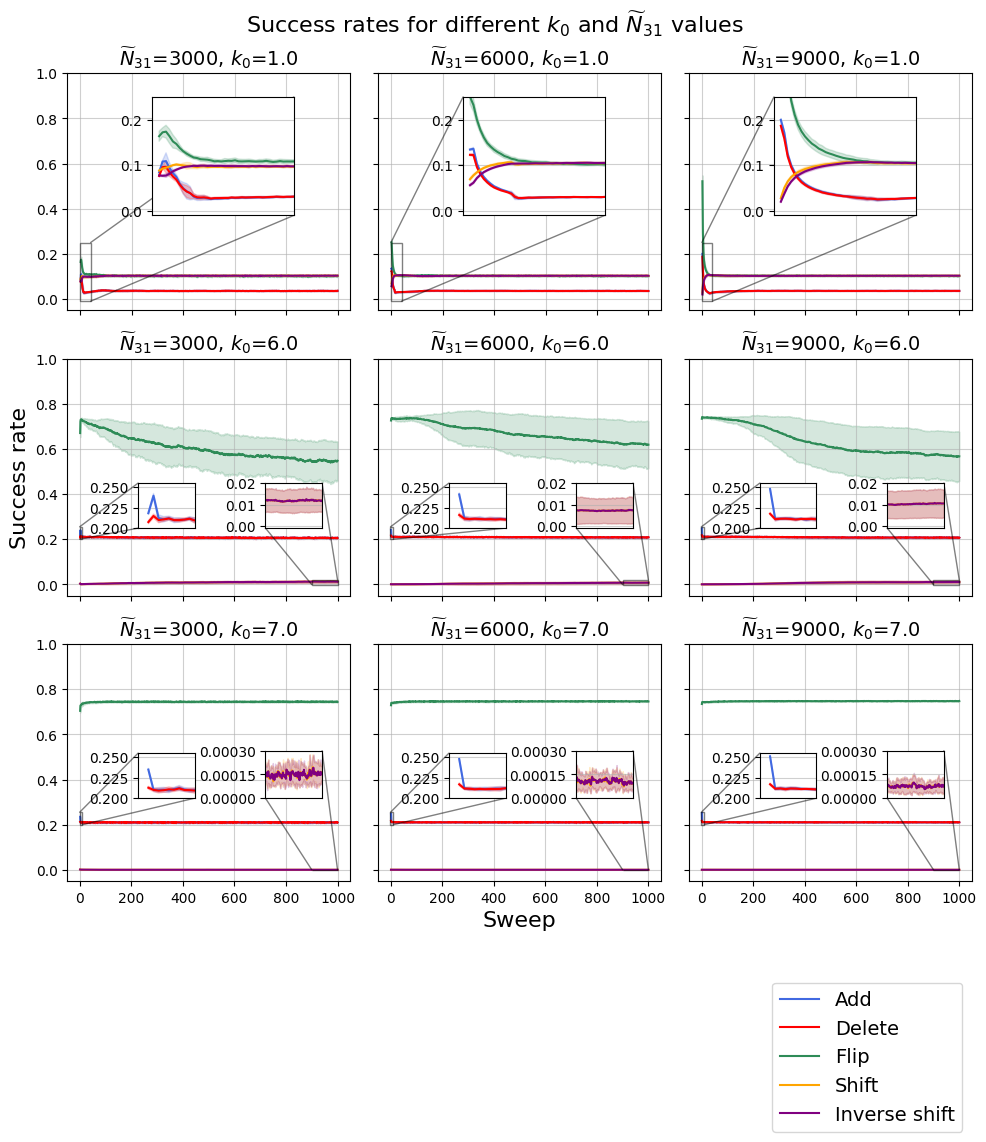

In [12]:
k0_values = [1.0, 6.0, 7.0]
N_values = [3000, 6000, 9000]
T = 3

fig, axes = plt.subplots(len(k0_values), len(N_values), figsize=(10, 12))

for i, k0 in enumerate(k0_values):
    for j, N in enumerate(N_values):
        path = f'measurements_thermal/k0={k0}'
        filepaths_successes = glob.glob(f'{path}/T{T}*tswps=1000_*kstps={N * 100}*successes.npy')
        filepaths_fails = glob.glob(f'{path}/T{T}*tswps=1000_*kstps={N * 100}*fails.npy')
        sr_add = []
        sr_delete = []
        sr_flip = []
        sr_shift = []
        sr_ishift = []

        for k in range(len(filepaths_successes)):
            successes = np.load(filepaths_successes[k])
            fails = np.load(filepaths_fails[k])
            sr_add.append(successes[:, 0] / (successes[:, 0] + fails[:, 0]))
            sr_delete.append(successes[:, 1] / (successes[:, 1] + fails[:, 1]))
            sr_flip.append(successes[:, 2] / (successes[:, 2] + fails[:, 2]))
            sr_shift.append(successes[:, 3] / (successes[:, 3] + fails[:, 3]))
            sr_ishift.append(successes[:, 4] / (successes[:, 4] + fails[:, 4]))

        # Make it a df to plot easily the mean and std
        df_sr_add = pd.DataFrame(sr_add)
        df_sr_delete = pd.DataFrame(sr_delete)
        df_sr_flip = pd.DataFrame(sr_flip)
        df_sr_shift = pd.DataFrame(sr_shift)
        df_sr_ishift = pd.DataFrame(sr_ishift)

        # Make a column for chain, sweep and the values sr
        df_sr_add = df_sr_add.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
        df_sr_delete = df_sr_delete.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
        df_sr_flip = df_sr_flip.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
        df_sr_shift = df_sr_shift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
        df_sr_ishift = df_sr_ishift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()

        # Increase sweep number by 1
        df_sr_add['sweep'] += 1
        df_sr_delete['sweep'] += 1
        df_sr_flip['sweep'] += 1
        df_sr_shift['sweep'] += 1
        df_sr_ishift['sweep'] += 1

        ax = axes[i, j]
        sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue', ax=ax)
        sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='red', ax=ax)
        sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', label='Flip', color='seagreen', ax=ax)
        sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='orange', ax=ax)
        sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse shift', color='purple', ax=ax)
        ax.set_title(f'$\widetilde{{N}}_{{31}}$={N}, $k_0$={k0}', fontsize=14)
        ax.grid(True, which="both", ls="-", alpha=0.6)

        # Add zoom-in box with y [0, 1] place in the center of the plot
        if i == 0:
            axins = ax.inset_axes([0.3, 0.4, 0.5, 0.5])
            axins.set_xlim(-1, 40)
            axins.set_ylim(-0.01, 0.25)
            axins.set_xticks([])
            axins.set_yticks([0, 0.1, 0.2])
        else:
            if i == 1:
                axins = ax.inset_axes([0.25, 0.285, 0.2, 0.19])
                axins.set_xlim(-1, 10)
                axins.set_ylim(0.2, 0.255)
                axins.set_xticks([])
                axins.set_yticks([0.2, 0.225, 0.25])

                # Add a second zoom-in box for the last row
                axins2 = ax.inset_axes([0.7, 0.285, 0.2, 0.19])
                axins2.set_xlim(900, 1000)
                axins2.set_ylim(-0.001, 0.02)
                axins2.set_xticks([])
                axins2.set_yticks([0, 0.01, 0.02])
            elif i == 2:
                axins = ax.inset_axes([0.25, 0.35, 0.2, 0.19])
                axins.set_xlim(-1, 10)
                axins.set_ylim(0.2, 0.255)
                axins.set_xticks([])
                axins.set_yticks([0.2, 0.225, 0.25])

                # Add a second zoom-in box for the last row
                axins2 = ax.inset_axes([0.7, 0.35, 0.2, 0.2])
                axins2.set_xlim(900, 1000)
                axins2.set_ylim(0, 0.0003)
                axins2.set_xticks([])
                axins2.set_yticks([0, 0.00015, 0.0003])

            sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', color='royalblue', ax=axins2)
            sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd',color='red', ax=axins2)
            sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', color='seagreen', ax=axins2)
            sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', color='orange', ax=axins2)
            sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd',color='purple', ax=axins2)
            axins2.set_xlabel('')
            axins2.set_ylabel('')
            axins2.grid(True, which="both", ls="-", alpha=0.6)
            ax.indicate_inset_zoom(axins2, edgecolor='black')

        sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', color='royalblue', ax=axins)
        sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd',color='red', ax=axins)
        sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', color='seagreen', ax=axins)
        sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', color='orange', ax=axins)
        sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd',color='purple', ax=axins)
        axins.set_xlabel('')
        axins.set_ylabel('')
        axins.grid(True, which="both", ls="-", alpha=0.6)
        ax.indicate_inset_zoom(axins, edgecolor='black')

        # Remove x and y labels
        ax.set_xlabel('')
        ax.set_ylabel('')

        # Only keep axis ticks on the left and bottom
        if i != len(k0_values) - 1:
            ax.xaxis.set_major_formatter(NullFormatter())
            axins.xaxis.set_major_formatter(NullFormatter())
        if j != 0:
            ax.yaxis.set_major_formatter(NullFormatter())

        # If first row
        ax.set_ylim(-0.05, 1)
        ax.get_legend().remove()

        # If middle row and first column, add y label
        if i == 1 and j == 0:
            ax.set_ylabel('Success rate', fontsize=16)
        
        # If last row and middle column, add x label
        if i == 2 and j == 1:
            ax.set_xlabel('Sweep', fontsize=16)

# Add general labels to the figure
fig.suptitle('Success rates for different $k_0$ and $\widetilde{N}_{31}$ values', fontsize=16)

# Remove rendundant legend labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='lower right', bbox_to_anchor=(1, -1.1), fontsize=14)

# Put the legend out of the figure
plt.subplots_adjust(right=0.85)
plt.tight_layout()
plt.savefig('plots/success_rates/success_rates_N.png', dpi=400, bbox_inches='tight')